In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
library(DiffBind)
library(tidyr)
library(wesanderson)
library(viridis)
library(gplots)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [2]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Allelic_ATAC/X_to_A_allelic_ratio/")

In [3]:
df_allelic_full <- read.delim("df_allelic_full.txt")

In [4]:
head(df_allelic_full)

seqnames,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1


In [5]:
names(df_allelic_full)[names(df_allelic_full) == 'seqnames'] <- 'chr'

In [6]:
head(df_allelic_full)

chr,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1


In [7]:
df_allelic_full$names <- 1:nrow(df_allelic_full) 

In [8]:
head(df_allelic_full)

chr,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C,names
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2,1
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1,3
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2,4
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1,5
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1,6


In [9]:
variables <- c("chr", "names", "Day0_M", "Day8_M", "Day9_M", "Day10_M", "Day12_M", "iPSCs_M", "Day0_C", "Day8_C", "Day9_C", "Day10_C", "Day12_C", "iPSCs_C")

In [10]:
df_allelic_full <- df_allelic_full[variables]

In [11]:
head(df_allelic_full)

chr,names,Day0_M,Day8_M,Day9_M,Day10_M,Day12_M,iPSCs_M,Day0_C,Day8_C,Day9_C,Day10_C,Day12_C,iPSCs_C
1,1,1,1,7,2,5,1,1,1,1,1,1,2
1,2,1,21,16,13,3,1,1,12,9,9,4,2
1,3,1,2,1,5,4,1,3,1,2,1,2,1
1,4,1,1,1,1,1,5,1,1,1,5,3,2
1,5,1,3,2,1,3,5,1,1,1,4,1,1
1,6,2,1,1,1,1,4,2,6,1,1,1,1


In [12]:
nrow(df_allelic_full)

[1] 408372

In [13]:
df_allelic_full_gathered <- gather(df_allelic_full, sample_allele, count, -chr, -names)

In [14]:
df_allelic_full_gathered <- separate(data = df_allelic_full_gathered, col = sample_allele, into = c("sample", "allele"), sep = "_")

In [15]:
head(df_allelic_full_gathered)

chr,names,sample,allele,count
1,1,Day0,M,1
1,2,Day0,M,1
1,3,Day0,M,1
1,4,Day0,M,1
1,5,Day0,M,1
1,6,Day0,M,2


In [16]:
df_allelic_full_gathered <- spread(df_allelic_full_gathered, allele, count)

In [17]:
head(df_allelic_full_gathered)

chr,names,sample,C,M
1,1,Day0,1,1
1,1,Day10,1,2
1,1,Day12,1,5
1,1,Day8,1,1
1,1,Day9,1,7
1,1,iPSCs,2,1


In [18]:
df_allelic_full_gathered$sample <- factor(df_allelic_full_gathered$sample, levels=c('Day0', 'Day8', 'Day9', 'Day10', 'Day12', 'iPSCs'))

In [19]:
df_allelic_full_gathered <- df_allelic_full_gathered %>% arrange(chr, names, sample)

In [20]:
head(df_allelic_full_gathered)

chr,names,sample,C,M
1,1,Day0,1,1
1,1,Day8,1,1
1,1,Day9,1,7
1,1,Day10,1,2
1,1,Day12,1,5
1,1,iPSCs,2,1


In [21]:
df_allelic_full_gathered$sumR <- df_allelic_full_gathered$C + df_allelic_full_gathered$M

In [22]:
head(df_allelic_full_gathered)

chr,names,sample,C,M,sumR
1,1,Day0,1,1,2
1,1,Day8,1,1,2
1,1,Day9,1,7,8
1,1,Day10,1,2,3
1,1,Day12,1,5,6
1,1,iPSCs,2,1,3


In [23]:
nrow(df_allelic_full_gathered)

[1] 2450232

In [24]:
count_samples <- df_allelic_full_gathered %>% group_by(sample) %>% summarise(total_reads = sum(sumR))
df_allelic_full_gathered <- merge(df_allelic_full_gathered, count_samples, by = "sample")

In [25]:
head(df_allelic_full_gathered)

sample,chr,names,C,M,sumR,total_reads
Day0,1,1,1,1,2,11348313
Day0,17,177148,1,1,2,11348313
Day0,10,44288,23,21,44,11348313
Day0,9,398582,1,6,7,11348313
Day0,4,265722,63,45,108,11348313
Day0,14,132862,5,1,6,11348313


In [26]:
df_allelic_full_gathered$mus_norm <- log1p((df_allelic_full_gathered$M/df_allelic_full_gathered$total_reads)*10000)
df_allelic_full_gathered$cast_norm <- log1p((df_allelic_full_gathered$C/df_allelic_full_gathered$total_reads)*10000)

In [27]:
head(df_allelic_full_gathered)

sample,chr,names,C,M,sumR,total_reads,mus_norm,cast_norm
Day0,1,1,1,1,2,11348313,0.0008808002,0.0008808002
Day0,17,177148,1,1,2,11348313,0.0008808002,0.0008808002
Day0,10,44288,23,21,44,11348313,0.0183358198,0.0200646808
Day0,9,398582,1,6,7,11348313,0.0052732017,0.0008808002
Day0,4,265722,63,45,108,11348313,0.0388874566,0.0540286662
Day0,14,132862,5,1,6,11348313,0.0008808002,0.0043962635


Filter for X chromosome and equal to or more than 10 reads between cast and mus

In [28]:
class(df_allelic_full_gathered)

[1] "data.frame"

In [29]:
nrow(df_allelic_full_gathered)

[1] 2450232

In [30]:
X_10reads <- df_allelic_full_gathered[ which(df_allelic_full_gathered$chr=='X' & df_allelic_full_gathered$sumR >= 10),]
Auto_10reads <- df_allelic_full_gathered[ which(df_allelic_full_gathered$chr!= "X" & df_allelic_full_gathered$chr!= "Y" & df_allelic_full_gathered$chr!= "MT" & df_allelic_full_gathered$sumR >= 10),]
allchr_10reads <- df_allelic_full_gathered[ which( df_allelic_full_gathered$chr!= "Y" & df_allelic_full_gathered$chr!= "MT" & df_allelic_full_gathered$sumR >= 10),]

In [31]:
head(allchr_10reads)

,sample,chr,names,C,M,sumR,total_reads,mus_norm,cast_norm
3,Day0,10,44288,23,21,44,11348313,0.018335820,0.020064681
5,Day0,4,265722,63,45,108,11348313,0.038887457,0.054028666
10,Day0,9,398583,2,8,10,11348313,0.007024774,0.001760825
11,Day0,4,265723,39,24,63,11348313,0.020927992,0.033789009
16,Day0,9,398584,61,67,128,11348313,0.057362471,0.052357587
22,Day0,9,398585,74,36,110,11348313,0.031230004,0.063170020


In [32]:
allchr_10reads <- subset(allchr_10reads, sample == 'Day0')

In [33]:
allchr_10reads$chr <- factor(allchr_10reads$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))

In [34]:
median_of_chr <- allchr_10reads %>% group_by(chr) %>% summarise(median_chr_mus = median(mus_norm))
#Now you have to make the median of the chromosomes except the one that will be used to make the ratio. e.g. for chr 1 you have to take the median of chr 2-19. 
#this is done with excel faster for now. 

In [35]:
median_of_chr

chr,median_chr_mus
X,0.0008808002
1,0.0113903304
2,0.0105187425
3,0.0105187425
4,0.0113903304
5,0.0113903304
6,0.0105187425
7,0.0113903304
8,0.0113903304
9,0.0105187425


In [36]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Xa_Xi_dynamics/")

In [37]:
write.table(median_of_chr, file = 'median_of_chr_mus.txt', sep = "\t")

In [38]:
median_autos_except_thisone <- read.delim("median_autos_except_thisone_mus.txt")

In [39]:
head(median_autos_except_thisone)

chr,median_chr_mus,median_autos_except_thisone_mus
X,0.00088080,0.01051874
1,0.01139033,0.01051874
2,0.01051874,0.01095454
3,0.01051874,0.01095454
4,0.01139033,0.01051874
5,0.01139033,0.01051874


In [40]:
allchr_10reads <- merge(allchr_10reads, median_autos_except_thisone, by = "chr")

In [41]:
head(allchr_10reads)

chr,sample,names,C,M,sumR,total_reads,mus_norm,cast_norm,median_chr_mus,median_autos_except_thisone_mus
1,Day0,29341,5,7,12,11348313,0.006149372,0.004396263,0.01139033,0.01051874
1,Day0,4475,29,33,62,11348313,0.028664434,0.025233402,0.01139033,0.01051874
1,Day0,1025,7,7,14,11348313,0.006149372,0.006149372,0.01139033,0.01051874
1,Day0,237,19,34,53,11348313,0.029520355,0.016603965,0.01139033,0.01051874
1,Day0,18967,24,15,39,11348313,0.013131230,0.020927992,0.01139033,0.01051874
1,Day0,5510,58,53,111,11348313,0.045645202,0.049845719,0.01139033,0.01051874


In [42]:
allchr_10reads$chr_to_auto_ratio_mus <- allchr_10reads$mus_norm/allchr_10reads$median_autos_except_thisone_mus

In [43]:
options(repr.plot.width=10, repr.plot.height=3)
plot <- ggplot(allchr_10reads, aes(x=chr, y=chr_to_auto_ratio_mus, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 1, show.legend=FALSE, outlier.shape = NA) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.3, fill="white", alpha = 0.5) +
  
  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+
    xlab("") + 
    ylab("chr/Auto accessibility ratio MEFs mus")+
    coord_cartesian(ylim = c(0,4))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

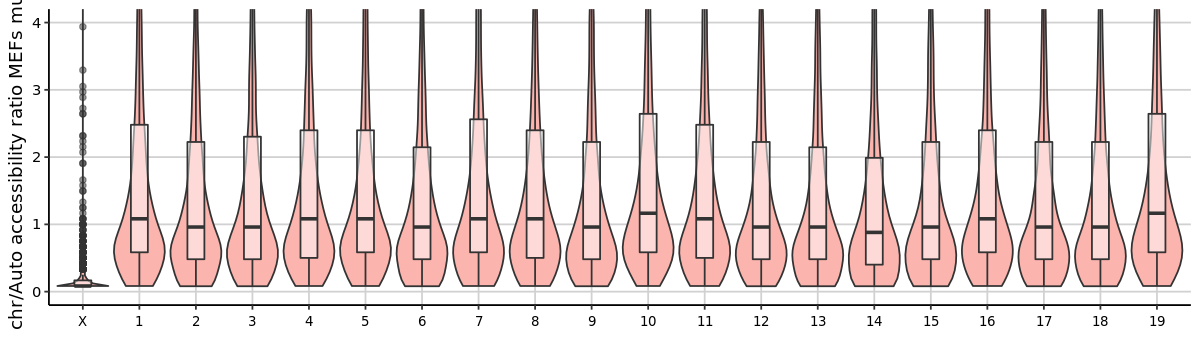

In [44]:
plot

In [45]:
ggsave("chr_to_auto_ratio_MEFs_mus.pdf", width = 10, height = 3)

In [93]:
res2 <- pairwise.wilcox.test(X_10reads$x_to_auto_ratio, X_10reads$sample, p.adjust.method = "bonferroni")

In [94]:
res2$p.value

,Day0,Day8,Day9,Day10,Day12
Day8,1.000000e+00,NA,NA,NA,NA
Day9,1.000000e+00,1.000000e+00,NA,NA,NA
Day10,1.000000e+00,4.461100e-02,1.000000e+00,NA,NA
Day12,1.457788e-15,5.206473e-25,8.233927e-26,3.542285e-15,NA
iPSCs,3.504081e-52,1.716923e-63,1.969412e-67,5.011372e-49,2.636826e-15
